Reference: https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from sklearn import metrics

In [3]:
# reading the labelled kaggle data
data_path = '/content/drive/My Drive/BT4222/Data/kaggle_labeled.csv'

data = pd.read_csv(data_path)
data.shape

(590504, 9)

In [0]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,response_ability_label,tweet_from_company
0,1881362,561461,True,Tue Oct 17 17:29:44 +0000 2017,@118424 The speed of your DATA can be compared...,1881361,1881363.0,1,0
1,740989,297215,True,Wed Oct 11 13:58:30 +0000 2017,@AppleSupport 11,740991,740988.0,1,0
2,621080,267405,True,Wed Nov 22 15:50:26 +0000 2017,@GloCare Please could you help me with any app...,"621079,621081",621082.0,1,0
3,2235058,141913,True,Sat Nov 11 08:21:51 +0000 2017,@Safaricom_Care DM (1),2235060,2235057.0,1,0
4,2163052,390852,True,Thu Nov 09 07:48:00 +0000 2017,"@LondonMidland hello, long queue at Worcester ...",2163051,NaN,1,0


# Pre-Processing and Vectorizing


In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [7]:
# tokenize to remove handles and some noises from "extended" words like "wayyyyyyyyyyyy"
df = data.copy()

df.drop(['tweet_id', 'inbound', 'author_id', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id', 'tweet_from_company'], axis=1, inplace=True)
df.shape

(590504, 2)

In [17]:
df.columns

Index(['text', 'response_ability_label', 'processed'], dtype='object')

In [0]:
df["processed"] = df.text.apply(tknzr.tokenize)

In [0]:
# Lemmatizing

from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

In [20]:
df['processed'] = df.processed.apply(lambda x: [lem.lemmatize(j) for j in x])

df.head()

,text,response_ability_label,processed
0,@118424 The speed of your DATA can be compared...,1,"[The, speed, of, your, DATA, can, be, compared..."
1,@AppleSupport 11,1,[11]
2,@GloCare Please could you help me with any app...,1,"[Please, could, you, help, me, with, any, app,..."
3,@Safaricom_Care DM (1),1,"[DM, (, 1, )]"
4,"@LondonMidland hello, long queue at Worcester ...",1,"[hello, ,, long, queue, at, Worcester, Shrub, ..."


In [21]:
df.processed = df.processed.apply(lambda x: ' '.join(x))

df.head()

,text,response_ability_label,processed
0,@118424 The speed of your DATA can be compared...,1,The speed of your DATA can be compared to that...
1,@AppleSupport 11,1,11
2,@GloCare Please could you help me with any app...,1,Please could you help me with any app name ?
3,@Safaricom_Care DM (1),1,DM ( 1 )
4,"@LondonMidland hello, long queue at Worcester ...",1,"hello , long queue at Worcester Shrub Hill a t..."


In [22]:
# removing punctuation (reference: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string)
import string

df["processed"] = df.processed.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,text,response_ability_label,processed
0,@118424 The speed of your DATA can be compared...,1,The speed of your DATA can be compared to that...
1,@AppleSupport 11,1,11
2,@GloCare Please could you help me with any app...,1,Please could you help me with any app name
3,@Safaricom_Care DM (1),1,DM 1
4,"@LondonMidland hello, long queue at Worcester ...",1,hello long queue at Worcester Shrub Hill a ti...


In [0]:
# splitting into training and validation set
X_train, X_val, y_train, y_val = train_test_split(df.processed, df.response_ability_label, test_size=0.2, random_state=2)

In [0]:
# what vectorizer should be used?
cv = CountVectorizer(lowercase=True, ngram_range=)

In [25]:
# fit and/or transforming to training set

# fit and transform X_train
X_train_dtm = cv.fit_transform(X_train)

X_val_dtm = cv.transform(X_val)

X_train_dtm.shape

(472403, 1853767)

# Dimensionality Reducing Algorithms
*Can compare to see the before and after effects of such algo*

In [0]:

from sklearn.feature_selection import chi2

## Chi-square Feature Selection
Determining if doing a feature selection at this stage is better than at the vectorization stage (use base logreg model to compare) 
<br/>
Reference: https://github.com/tthustla/twitter_sentiment_analysis_part8/blob/master/Capstone_part4-Copy6.ipynb

In [0]:
chi2score = chi2(X_train_dtm, y_train)[0]

Text(0.5, 0, '$\\chi^2$')

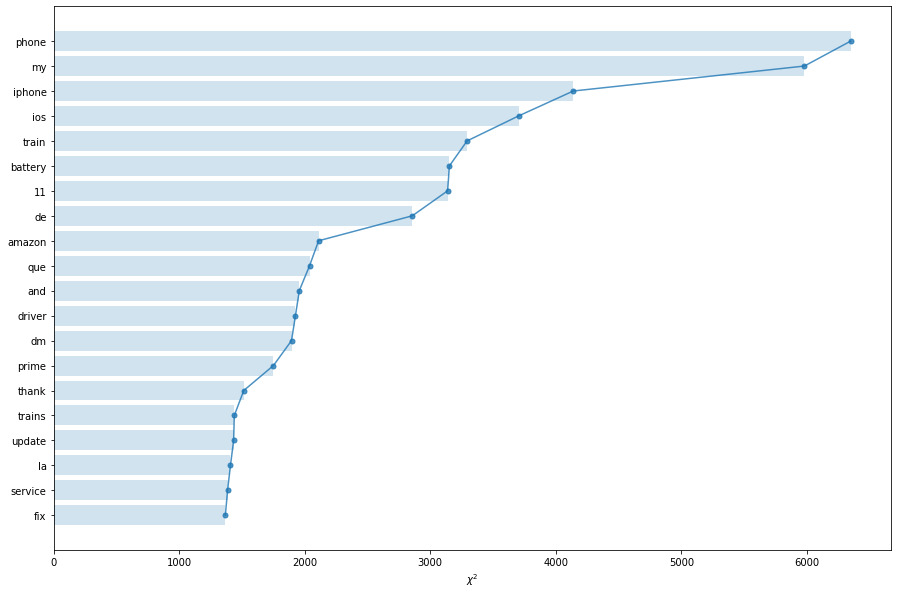

In [0]:
# plotting the top 20 word features useful for prediction

plt.figure(figsize=(15,10))
wscores = zip(cv.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression


ch2 = SelectKBest(chi2, k=200000)
x_train_chi2_selected = ch2.fit_transform(X_train_dtm, y_train)
x_validation_chi2_selected = ch2.transform(X_val_dtm)
clf = LogisticRegression(solver="saga", penalty='l1') # use l1 because we want to be harsh and eliminate alot of features
clf.fit(x_train_chi2_selected, y_train)
score = clf.score(x_validation_chi2_selected, y_val)

In [0]:
print("Training Accuracy: ", clf.score(x_train_chi2_selected, y_train))
print("Validation Accuracy: ", score)

# Ensemble Algorithms

In [0]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest

random_state=1, bootstrap=True, max_depth=10 --> 0.62786


In [29]:
# Random Forest Model

rf = RandomForestClassifier(random_state=1, bootstrap=True, max_depth=30, n_estimators=50)

rf.fit(X_train_dtm, y_train)

y_pred_class = rf.predict(X_val_dtm)

# Get the training accuracy
print('Training Accuracy: ', metrics.accuracy_score(y_train, rf.predict(X_train_dtm)))
# print the accuracy of its predictions
print('Validation Accuracy: ', metrics.accuracy_score(y_val, y_pred_class))

Training Accuracy:  0.6611833540430522
Validation Accuracy:  0.6351004648563517


### XGBoost Model

In [0]:
import time
from xgboost import XGBClassifier
from xgboost import plot_importance

In [27]:
# XGboost

xgb = XGBClassifier(n_estimators=500, random_state=2, max_depth=10)
# define the eval set and metric
eval_set = [(X_train_dtm, y_train), (X_val_dtm, y_val)]
eval_metric = ["auc","error"] # use auc since binary classification
# fit the model
%time xgb.fit(X_train_dtm, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True, early_stopping_rounds=10)

[0]	validation_0-auc:0.623977	validation_0-error:0.401627	validation_1-auc:0.62242	validation_1-error:0.402926
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-auc:0.627522	validation_0-error:0.401568	validation_1-auc:0.625724	validation_1-error:0.402748
[2]	validation_0-auc:0.634501	validation_0-error:0.39885	validation_1-auc:0.632186	validation_1-error:0.40003
[3]	validation_0-auc:0.647976	validation_0-error:0.398649	validation_1-auc:0.645171	validation_1-error:0.39992
[4]	validation_0-auc:0.651228	validation_0-error:0.397826	validation_1-auc:0.648644	validation_1-error:0.399455
[5]	validation_0-auc:0.65316	validation_0-error:0.395285	validation_1-auc:0.650052	validation_1-error:0.396525
[6]	validation_0-auc:0.656079	validation_0-error:0.390785	validation_1-auc:0.65302	validation_1-error:0.392545
[7]	validation_0-auc:0.660565	validation_0-error:0.391437	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

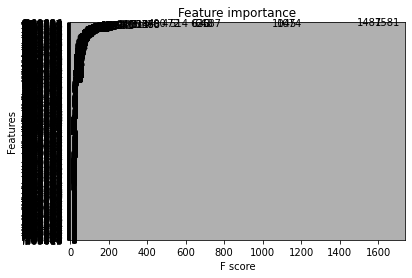

In [24]:
plot_importance(xgb)

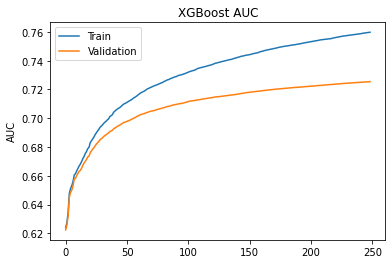

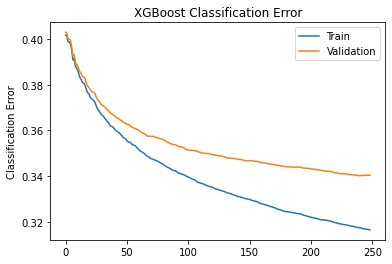

In [28]:
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot auc
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# Bayesian Algorithms

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
# Naive Bayes Multinomial Model

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_val_dtm)

# Get the training accuracy
print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
# print the accuracy of its predictions
print('Validation Accuracy: ', metrics.accuracy_score(y_val, y_pred_class))

Training Accuracy:  0.7575163578554751
Validation Accuracy:  0.7148118982904463


# Regression Algorithms

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
score = logreg.score(X_val_dtm, y_val)

print("Training Accuracy: ", logreg.score(X_train_dtm, y_train))
print("Validation Accuracy:", score)

Training Accuracy:  0.7616272546956729
Validation Accuracy: 0.7312131141988637


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Predicting on Twitter dataset

In [34]:
twitter_path = '/content/drive/My Drive/BT4222/Data/cust_tweets.csv'

tweets = pd.read_csv(twitter_path)
tweets.shape

(7643, 8)

In [35]:
# tokenize to remove handles and some noises from "extended" words like "wayyyyyyyyyyyy"
cust = tweets.copy()

cust.drop(['Unnamed: 0', 'tweet_id', 'inbound', 'authod_id', 'created_at', 'in_response_to_tweet_id'], axis=1, inplace=True)
cust.shape

(7643, 2)

In [36]:
cust.columns

Index(['text', 'customers_of'], dtype='object')

In [0]:
cust["processed"] = cust.text.apply(tknzr.tokenize)

In [38]:
cust['processed'] = cust.processed.apply(lambda x: [lem.lemmatize(j) for j in x])

cust.head()

,text,customers_of,processed
0,@Jetstar_Asia Please check your DM. Thanks @Je...,JetStar Asia,"[Please, check, your, DM, ., Thanks]"
1,@Jetstar_Asia Pleas help me. I have also tried...,JetStar Asia,"[Pleas, help, me, ., I, have, also, tried, cal..."
2,RT @monilsj: Hi @Jetstar_Asia! I have noticed ...,JetStar Asia,"[RT, :, Hi, !, I, have, noticed, that, Air, As..."
3,Hi @Jetstar_Asia! I have noticed that Air Asia...,JetStar Asia,"[Hi, !, I, have, noticed, that, Air, Asia, and..."
4,RT @RayMSLim: @Jetstar_Asia why do you make it...,JetStar Asia,"[RT, :, why, do, you, make, it, so, difficult,..."


In [39]:
cust.processed = cust.processed.apply(lambda x: ' '.join(x))

cust.head()

,text,customers_of,processed
0,@Jetstar_Asia Please check your DM. Thanks @Je...,JetStar Asia,Please check your DM . Thanks
1,@Jetstar_Asia Pleas help me. I have also tried...,JetStar Asia,Pleas help me . I have also tried calling seve...
2,RT @monilsj: Hi @Jetstar_Asia! I have noticed ...,JetStar Asia,RT : Hi ! I have noticed that Air Asia and mor...
3,Hi @Jetstar_Asia! I have noticed that Air Asia...,JetStar Asia,Hi ! I have noticed that Air Asia and more rec...
4,RT @RayMSLim: @Jetstar_Asia why do you make it...,JetStar Asia,RT : why do you make it so difficult to apply ...


In [40]:
# removing punctuation (reference: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string)

cust["processed"] = cust.processed.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
cust.head()

,text,customers_of,processed
0,@Jetstar_Asia Please check your DM. Thanks @Je...,JetStar Asia,Please check your DM Thanks
1,@Jetstar_Asia Pleas help me. I have also tried...,JetStar Asia,Pleas help me I have also tried calling sever...
2,RT @monilsj: Hi @Jetstar_Asia! I have noticed ...,JetStar Asia,RT Hi I have noticed that Air Asia and more ...
3,Hi @Jetstar_Asia! I have noticed that Air Asia...,JetStar Asia,Hi I have noticed that Air Asia and more rece...
4,RT @RayMSLim: @Jetstar_Asia why do you make it...,JetStar Asia,RT why do you make it so difficult to apply f...


In [41]:
# fit and/or transforming to training set

# fit and transform X_train
X_test = cv.transform(cust.processed)

X_test.shape

(7643, 223877)

### Using XGBoost to predict

In [0]:
xgb_pred = xgb.predict(X_test)

xgb_pred = pd.DataFrame(xgb_pred, columns=['label'])

In [49]:
xgb_pred.head()

,label
0,0
1,0
2,1
3,1
4,0


In [0]:
from google.colab import files

# to download the csv
xgb_pred.to_csv('xgb_pred.csv')
files.download('xgb_pred.csv')

# Extra Stuff

In [0]:
# uploading the csv containing all the company names (reference: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
from google.colab import files
uploaded = files.upload()

Saving kagglecompanies.csv to kagglecompanies.csv


In [0]:
# indicating the company names as stopwords
import io

companynames = pd.read_csv(io.BytesIO(uploaded['kagglecompanies.csv']), names=["Names"])
companynames.head()

,Names
0,ATT
1,ATVIAssist
2,AWSSupport
3,AdobeCare
4,AirAsiaSupport


In [0]:
addtl_stopwords = list(companynames.Names.values) # companynames.Names.values is numpy array
print(addtl_stopwords[:6])

['ATT', 'ATVIAssist', 'AWSSupport', 'AdobeCare', 'AirAsiaSupport', 'AirbnbHelp']


In [0]:
# function to remove stop words

def remove_stop_words(corpus):
    removed_stop_words = []
    for word in corpus:
        if word not in addtl_stopwords:
          removed_stop_words.append(word)
    return ' '.join(removed_stop_words)